In [ ]:
!pip install nltk

In [8]:
import nltk


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from typing import Counter

In [3]:
df = pd.read_excel("/content/Labeled_tweets_June.xlsx")
df.head(2)

,tweet_ids,UserTags,follower_counts,TimeStamps,Tweets,retweets,creationTimeStamps_UTC,language,tweet_english,narrative_category
0,1934296676442992896,@DevotedDividend,49700,2025-06-15 22:37:18,$BTCI NEOS Bitcoin High Income ETF- high yield...,NaN,NaT,en,$BTCI NEOS Bitcoin High Income ETF- high yield...,Fundamental or Macro News
1,1934296652421985024,@JONDONI_CRYPTO,1672,2025-06-15 22:37:12,"""Bitcoin Price Echoes 2021 Collapse, Warns Leg...",NaN,NaT,en,"""Bitcoin Price Echoes 2021 Collapse, Warns Leg...",FUD or Scam


In [4]:
df = df[df['narrative_category']!='API_ERROR']

In [ ]:
df['UserTags'].nunique()

1326

In [ ]:
df['narrative_category'].unique()

array(['Fundamental or Macro News', 'FUD or Scam', 'Technical Analysis',
       'Hype and Social Sentiment', 'Regulatory or Geopolitical'],
      dtype=object)

In [5]:
def clean_word(text):
    # Remove hashtags and the word immediately following them BEFORE tokenization
    text = re.sub(r'#\w+\s*\S*', '', text)
    # Remove punctuation BEFORE tokenization
    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)
    clean_words = []
    stop_words = set(stopwords.words('english'))

    for word in words:
        word = word.lower()
        # Check if the word is not empty and not a stopword
        if word and word not in stop_words:
            clean_words.append(word)

    return ' '.join(clean_words)

In [35]:
def plot_word_freq(category):
  sliced_df = df[df['narrative_category']== category]
  l = []
  for i in range (len(sliced_df['tweet_english'])):
    l.append(sliced_df['tweet_english'].iloc[i])
  all_words = []
  for text in l:
      cleaned_text = clean_word(str(text)) # Ensure the element is a string before cleaning
      words = cleaned_text.split() # Split the cleaned text into words
      all_words.extend(words) # Add the words to the all_words list
  counter = Counter(all_words)
  df_word = pd.DataFrame(counter.most_common(21), columns=['word', 'frequency'])[lambda x: x['word'] != 'bitcoin']
  plt.figure(figsize = (7.5, 4.5))
  sns.barplot(x=df_word['frequency'], y = df_word['word'], color= "#7f7c92")
  plt.title(f"Frequency of top 20 words in {category} tweets")
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.show()
  return

In [22]:
df['narrative_category'].unique()

array(['Fundamental or Macro News', 'FUD or Scam', 'Technical Analysis',
       'Hype and Social Sentiment', 'Regulatory or Geopolitical'],
      dtype=object)

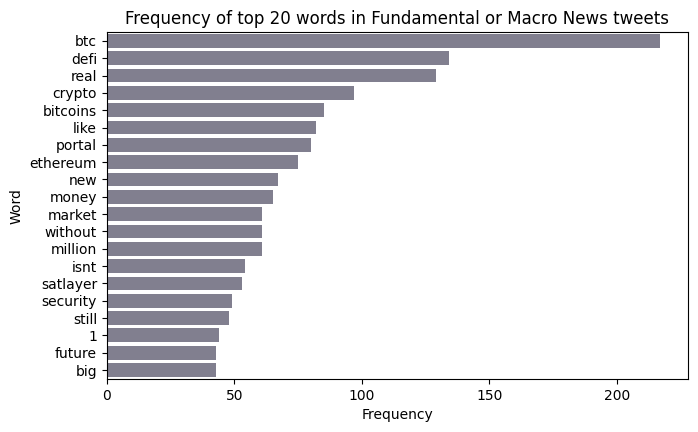

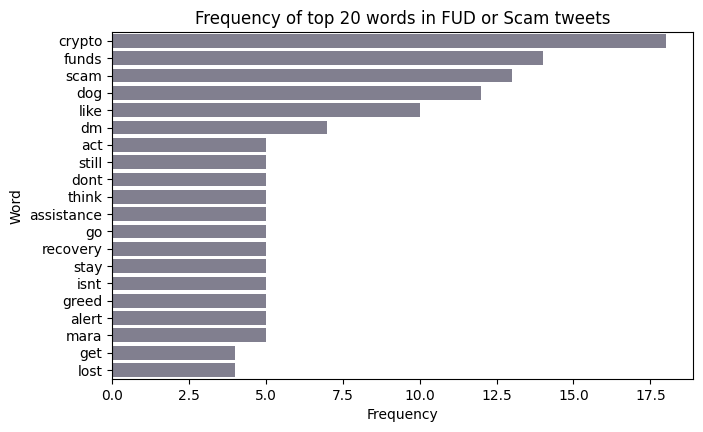

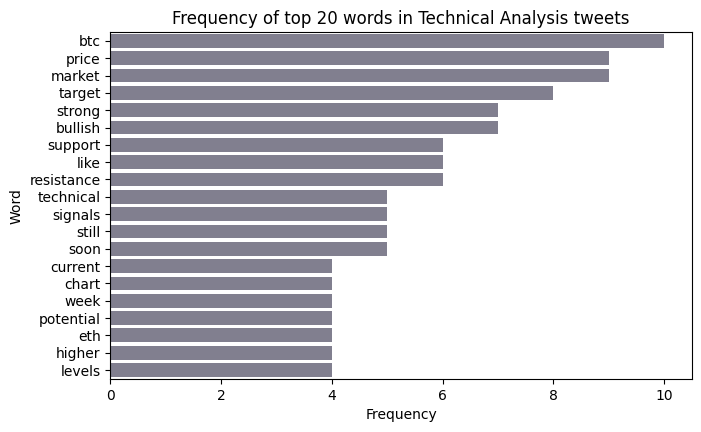

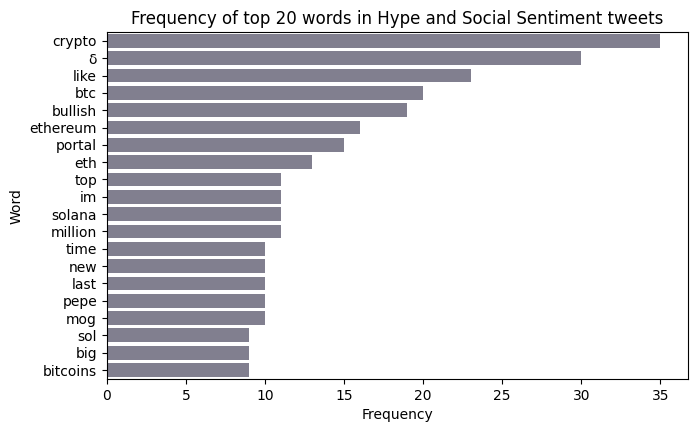

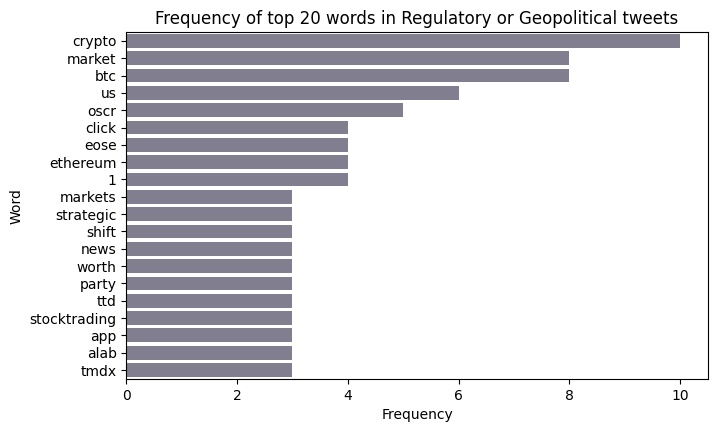

In [36]:
for category in df['narrative_category'].unique():
  plot_word_freq(category)